# Stock Market Analysis Project

We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017.

### Part 0: Import

** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)

**  *Note! Not everyone will be working on a computer that will give them open access to download the stock information using pandas_datareader (firewalls, admin permissions, etc...). Because of this, the csv file for the Tesla is provided in a data folder inside this folder. It is called Tesla_Stock.csv. Feel free to just use this with read_csv! **

** Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.**

** You will be needing api key for any data_source as google is out of service for stock predictions as earlier.**

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2017,1,1)

In [5]:
tesla=web.DataReader('TSLA','av-daily',start,end)
tesla.head()

,open,high,low,close,volume
2012-01-03,28.94,29.50,27.65,28.08,928100
2012-01-04,28.21,28.67,27.50,27.71,630100
2012-01-05,27.76,27.93,26.85,27.12,1005500
2012-01-06,27.20,27.79,26.41,26.91,986300
2012-01-09,27.00,27.49,26.12,27.25,897000


In [6]:
tesla.shape

(1258, 5)

### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [7]:
ford=web.DataReader('F','av-daily',start,end)
ford.head()

,open,high,low,close,volume
2012-01-03,11.00,11.25,10.99,11.13,45709900
2012-01-04,11.15,11.53,11.07,11.30,79725200
2012-01-05,11.33,11.63,11.24,11.59,67877500
2012-01-06,11.74,11.80,11.52,11.71,59840700
2012-01-09,11.83,11.95,11.70,11.80,53981500


In [8]:
gm=web.DataReader('GM','av-daily',start,end)
gm.head()

,open,high,low,close,volume
2012-01-03,20.83,21.18,20.75,21.05,9321300
2012-01-04,21.05,21.37,20.75,21.15,7856700
2012-01-05,21.10,22.29,20.96,22.17,17880600
2012-01-06,22.26,23.03,22.24,22.92,18234500
2012-01-09,23.20,23.43,22.70,22.84,12084500


## Part 2: Visualizing the Data


** Time to visualize the data. **
##### Recreating linear plot  of all the stocks->Open Price

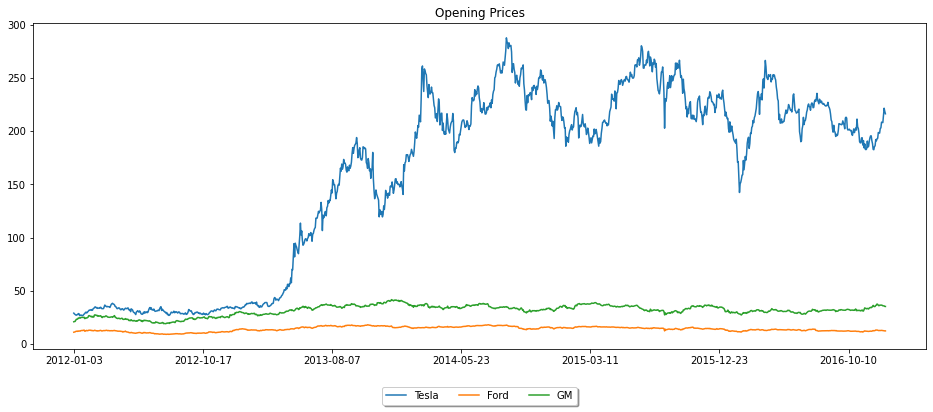

In [9]:
tesla['open'].plot(label='Tesla',figsize=(16,6),title='Opening Prices')

ford['open'].plot(label='Ford')

gm['open'].plot(label='GM')

#To hide '<matplotlib.legend.Legend at 0x2145b62dfd0>'' before the figure appears write 'plt.legend();' i.e.semicolon at the end

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=8);#ncol is size of box

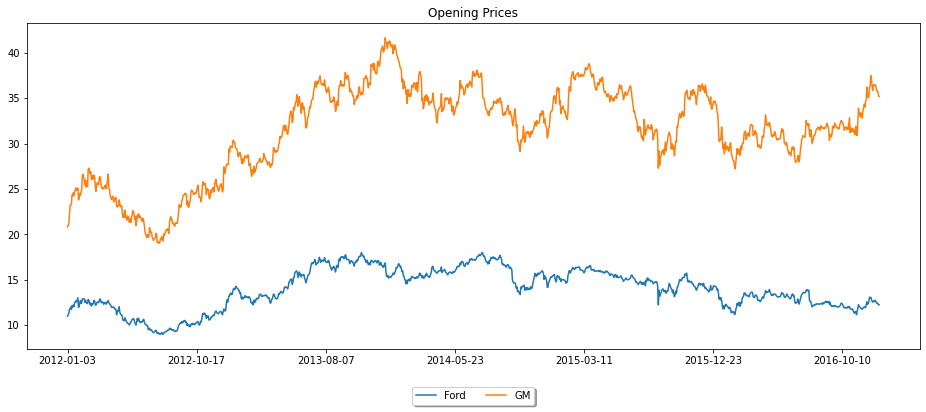

In [10]:
ford['open'].plot(label='Ford',figsize=(16,6),title='Opening Prices')

gm['open'].plot(label='GM')

#To hide '<matplotlib.legend.Legend at 0x2145b62dfd0>'' before the figure appears write 'plt.legend();' i.e.semicolon at the end

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=8);#ncol is size of box

____

** Plot the Volume of stock traded each day.**

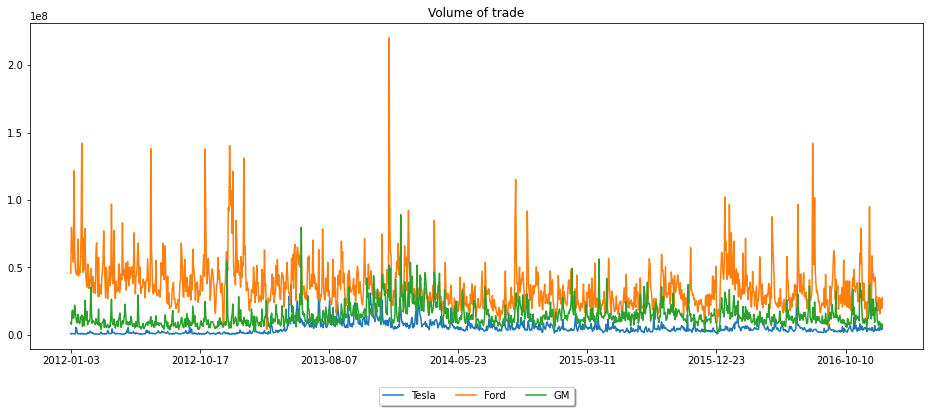

In [11]:
tesla['volume'].plot(label='Tesla',figsize=(16,6),title='Volume of trade')

ford['volume'].plot(label='Ford')

gm['volume'].plot(label='GM')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=8);#ncol is size of box

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**Ford plans to hit profits shares fall**

**Ford shares fells sharply after the company warned the cost of it's agressive push to launch new products would cut into profits of next year**

In [12]:
ford['volume'].idxmax()

'2013-12-18'

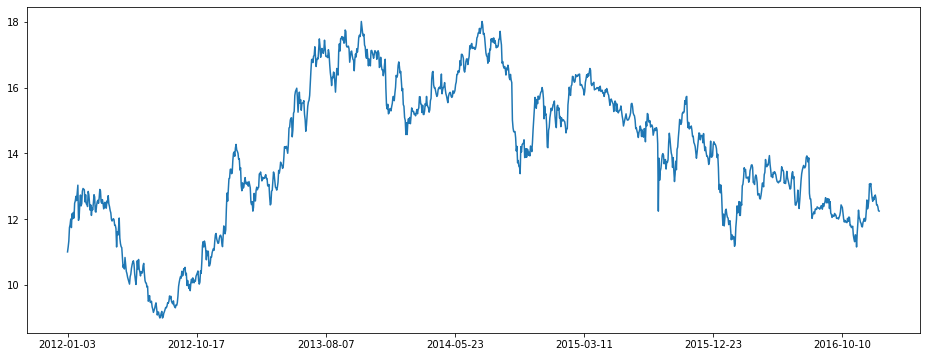

In [13]:
ford['open'].plot(figsize=(16,6))#This will mark on biggest loss but in this graph it won't be visible eddibly

____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [14]:
tesla['Total Traded']=tesla['open']*tesla['volume']
ford['Total Traded']=ford['open']*ford['volume']
gm['Total Traded']=gm['open']*gm['volume']

** Plot this "Total Traded" against the time index.**

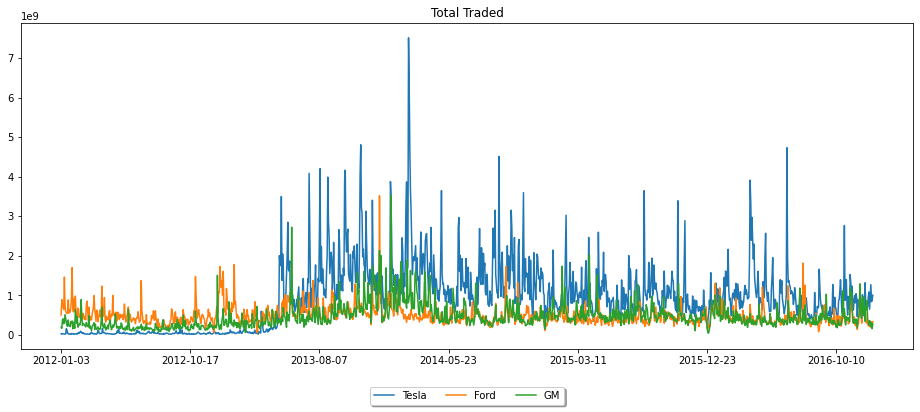

In [15]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,6),title='Total Traded')

ford['Total Traded'].plot(label='Ford')

gm['Total Traded'].plot(label='GM')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=8);#ncol is size of box

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [16]:
tesla['Total Traded'].idxmax()

'2014-02-25'

**On this day tesla shares surge on Morgan Stanley report**

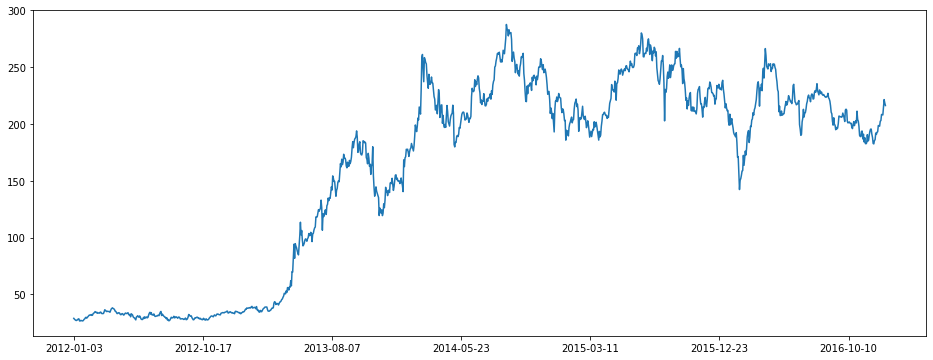

In [17]:
tesla['open'].plot(figsize=(16,6))

____

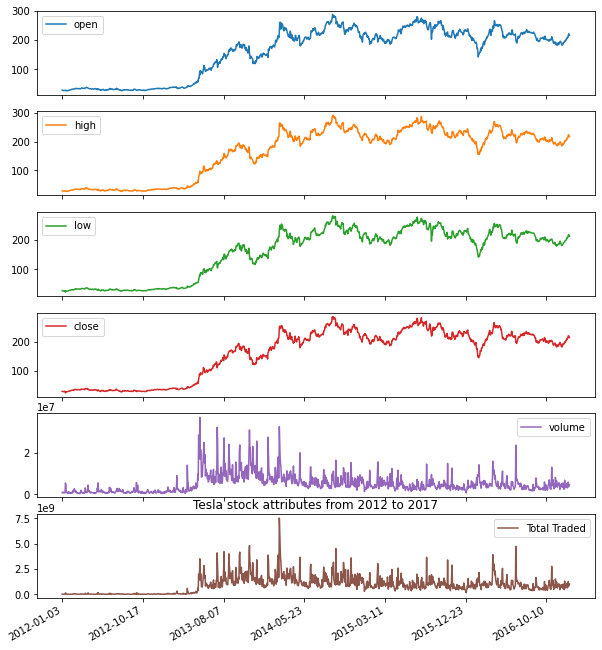

In [18]:
tesla['2012':'2017'].plot(subplots=True, figsize=(10,12))
plt.title('Tesla stock attributes from 2012 to 2017')
plt.show()

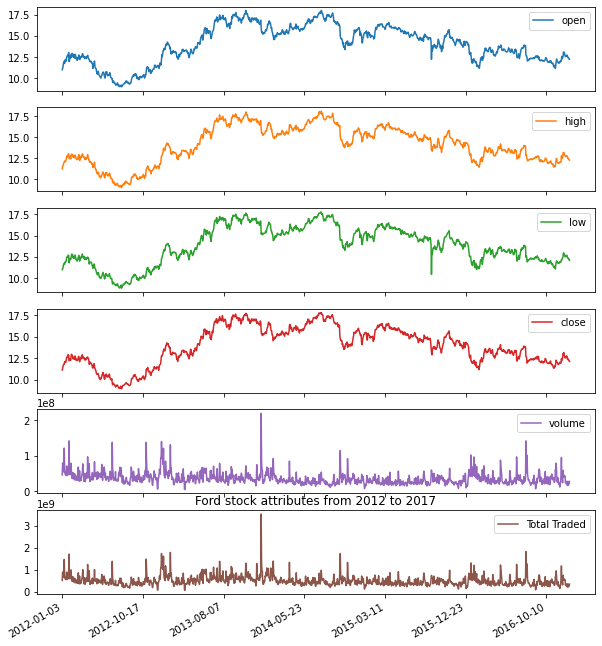

In [19]:
ford['2012':'2017'].plot(subplots=True, figsize=(10,12))
plt.title('Ford stock attributes from 2012 to 2017')
plt.show()

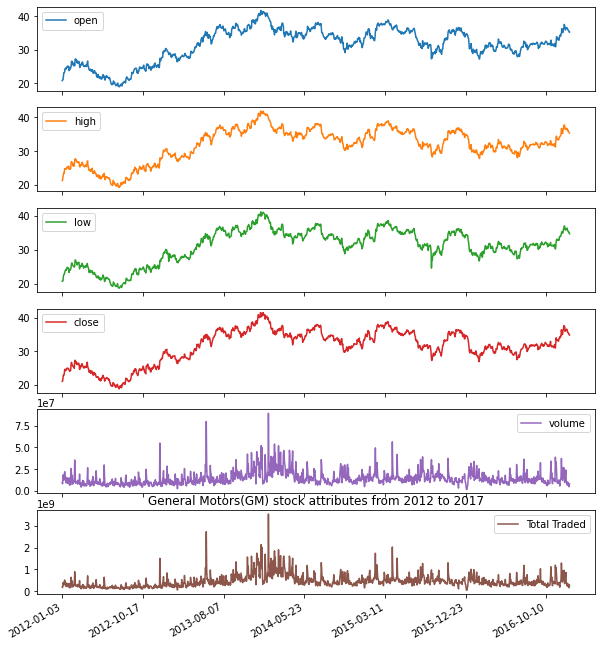

In [20]:
gm['2012':'2017'].plot(subplots=True, figsize=(10,12))
plt.title('General Motors(GM) stock attributes from 2012 to 2017')
plt.show()

____

**Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM.**

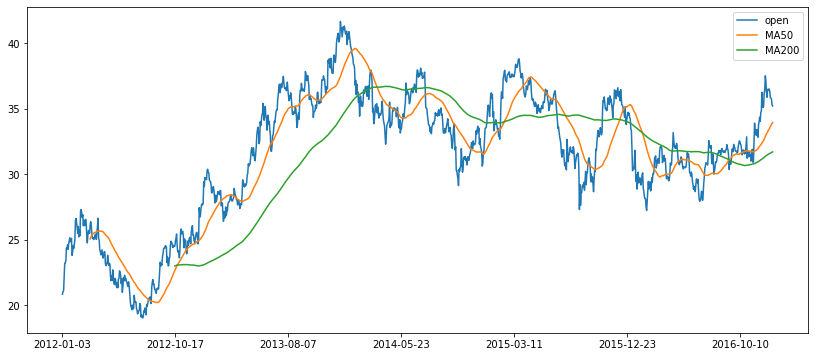

In [21]:
gm['MA50']=gm['open'].rolling(50).mean()
gm['MA200']=gm['open'].rolling(200).mean()
gm[['open','MA50','MA200']].plot(figsize=(14,6))

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. **

In [22]:
from pandas.plotting import scatter_matrix

In [23]:
car_comp=pd.concat([tesla['open'],ford['open'],gm['open']],axis=1)
car_comp.columns=['Tesla','Ford','GM']
car_comp.head()

,Tesla,Ford,GM
2012-01-03,28.94,11.00,20.83
2012-01-04,28.21,11.15,21.05
2012-01-05,27.76,11.33,21.10
2012-01-06,27.20,11.74,22.26
2012-01-09,27.00,11.83,23.20


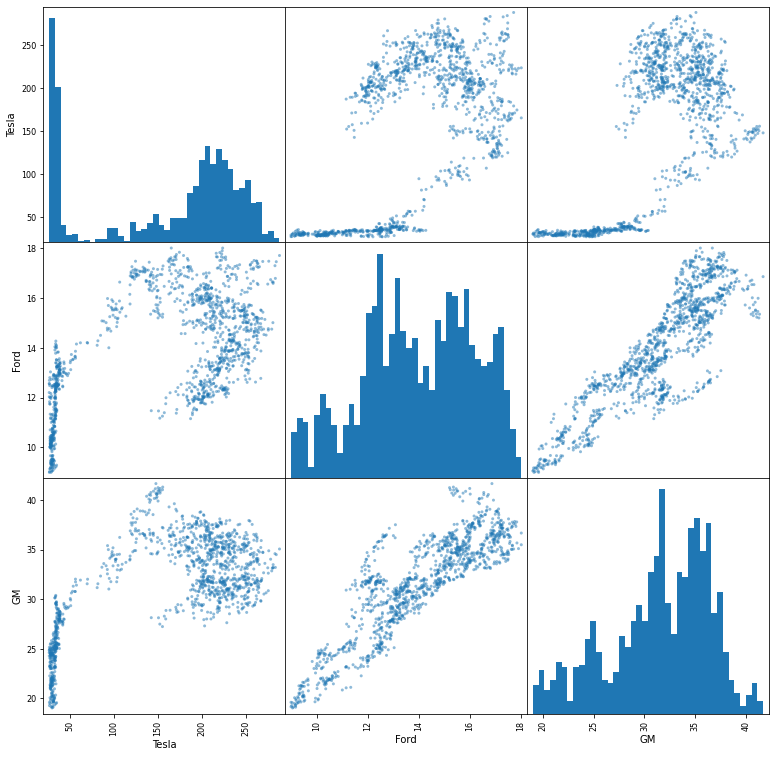

In [24]:
scatter_matrix(car_comp,figsize=(13,13),hist_kwds={'bins':40});
#hist_kwds for more bars

_____

** Create a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)**


Refer:-https://matplotlib.org/examples/pylab_examples/finance_demo.html

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change

##### Basically a profit or loss made respect to the previous day

First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method or we can also use pandas' built in pct_change method. **

In [25]:
#tesla['return']=(tesla['close']/tesla['close'].shift(1))-1    ->shift(1) means forward as value at place 0 will go to index 1
tesla['return']=tesla['close'].pct_change(1)

In [26]:
tesla.head()

,open,high,low,close,volume,Total Traded,return
2012-01-03,28.94,29.50,27.65,28.08,928100,26859214.0,NaN
2012-01-04,28.21,28.67,27.50,27.71,630100,17775121.0,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005500,27912680.0,-0.021292
2012-01-06,27.20,27.79,26.41,26.91,986300,26827360.0,-0.007743
2012-01-09,27.00,27.49,26.12,27.25,897000,24219000.0,0.012635


In [27]:
ford['return']=ford['close'].pct_change(1)
gm['return']=gm['close'].pct_change(1)

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

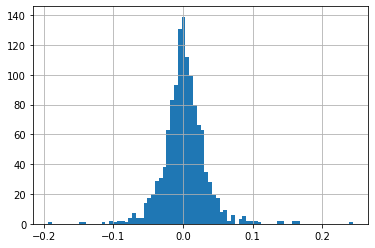

In [28]:
tesla['return'].hist(bins=80)

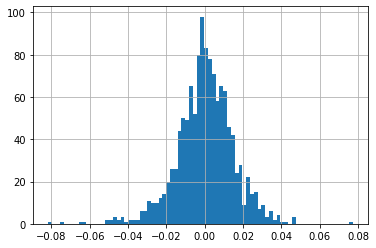

In [29]:
ford['return'].hist(bins=80)

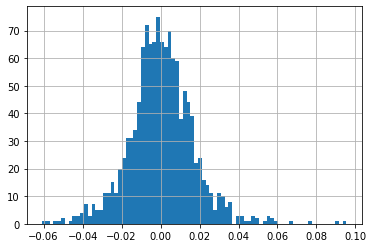

In [30]:
gm['return'].hist(bins=80)

____

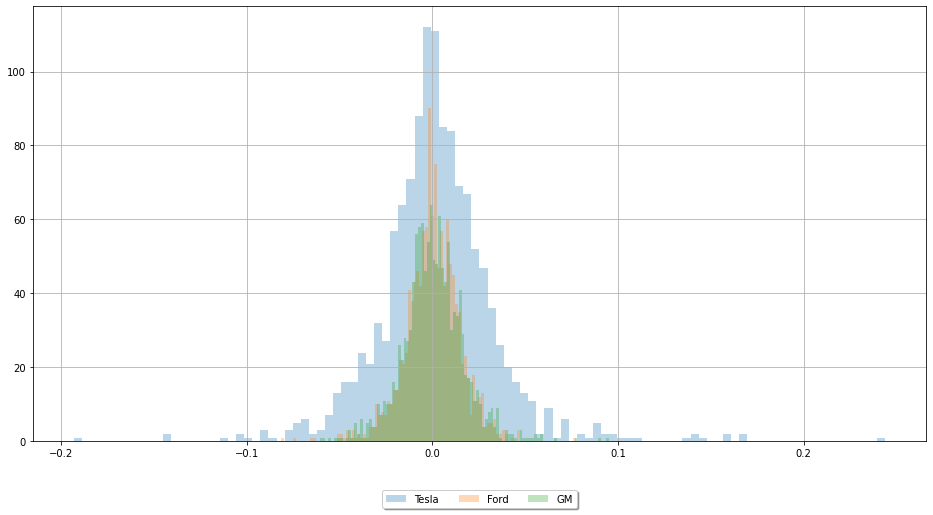

In [31]:
tesla['return'].hist(bins=100,label='Tesla',figsize=(16,8),alpha=0.3)#value of alpha towards 1 means visibility
ford['return'].hist(bins=100,label='Ford',figsize=(16,8),alpha=0.3)
gm['return'].hist(bins=100,label='GM',figsize=(16,8),alpha=0.3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=8);

Tesla is more volatile as it has a much wider distribution
____

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

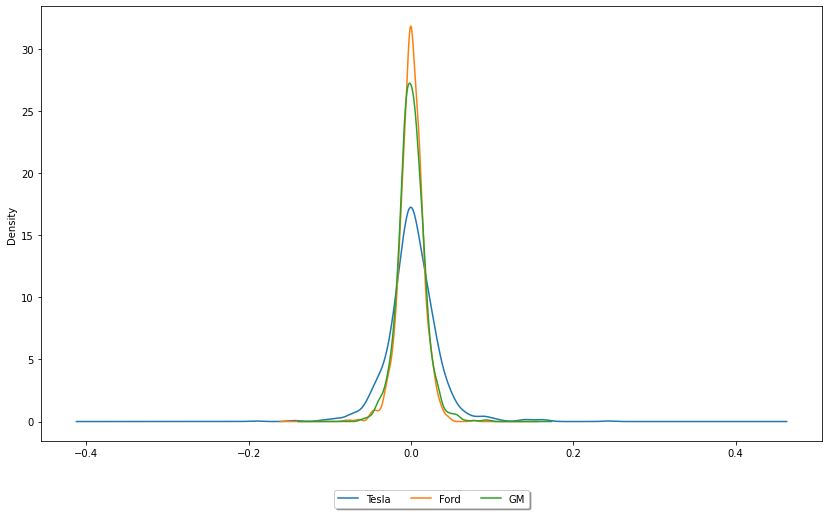

In [32]:
#WE can clearly see ford is way more stable than tesla and a little more stable than gm
tesla['return'].plot(kind='kde',label='Tesla',figsize=(14,8))
ford['return'].plot(kind='kde',label='Ford',figsize=(14,8))
gm['return'].plot(kind='kde',label='GM',figsize=(14,8))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=8);

** Try also creating some box plots comparing the returns. **

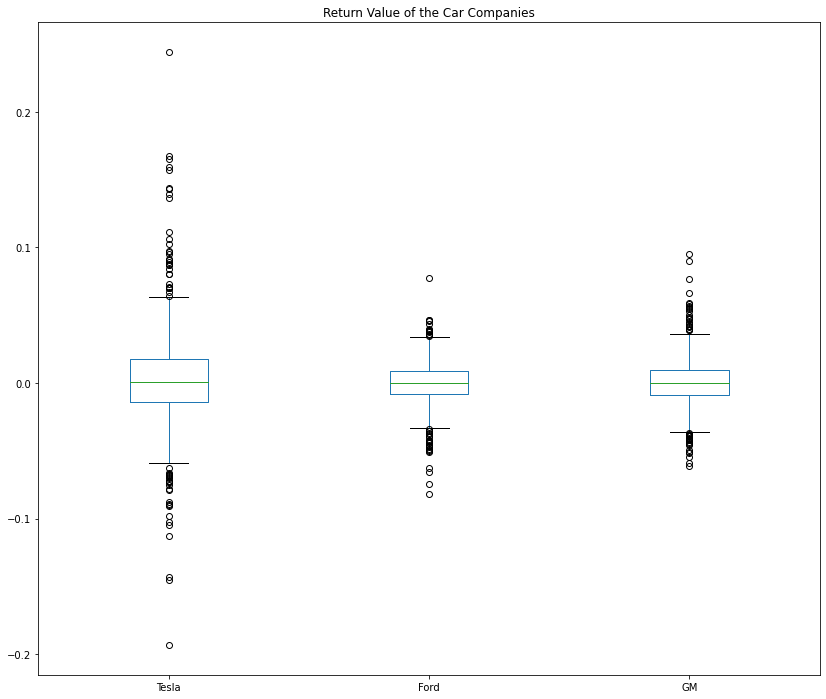

In [33]:
box_df=pd.concat([tesla['return'],ford['return'],gm['return']],axis=1)
box_df.columns=['Tesla','Ford','GM']
box_df.plot(kind='box',title='Return Value of the Car Companies',figsize=(14,12));

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

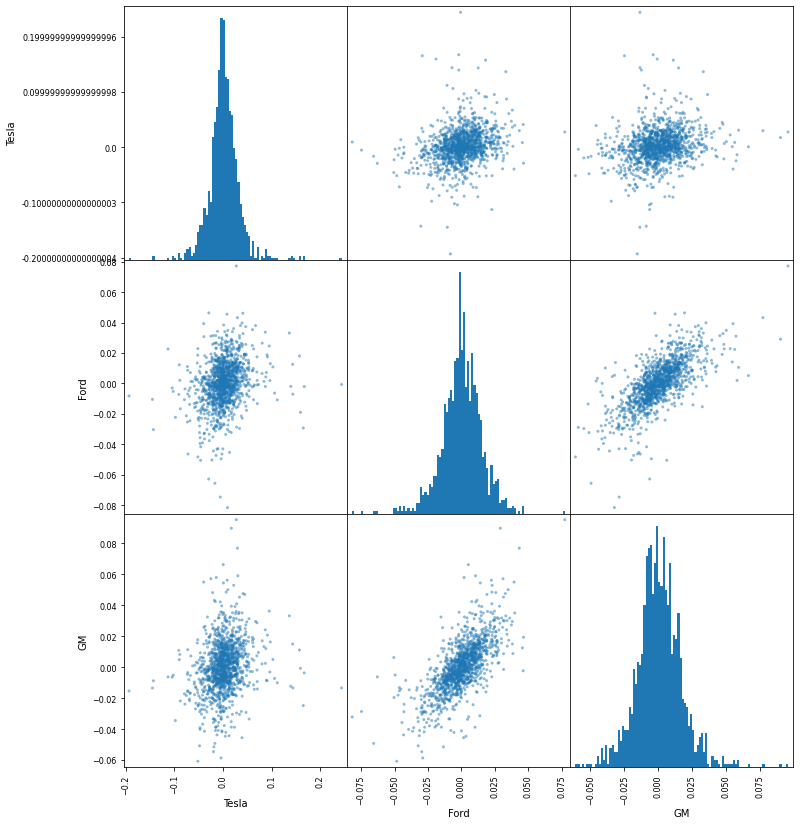

In [34]:
#print('Return Value of the Car Companies')
scatter_matrix(box_df,figsize=(12,14),hist_kwds={'bins':100});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in reg plot to view this more closely!**

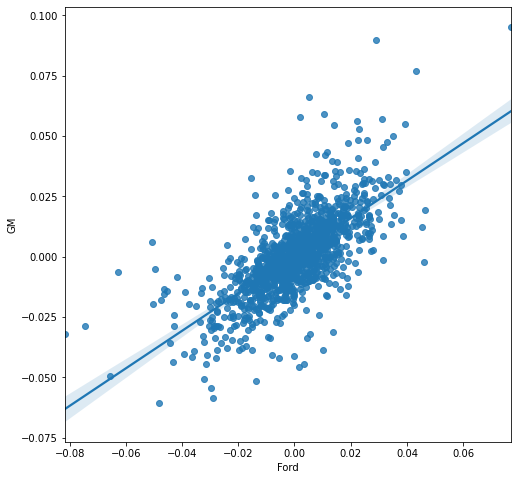

In [35]:
plt.figure(figsize=(8,8))
sns.regplot(x=box_df['Ford'],y=box_df['GM'])#For return values

____
## Cumulative Daily Returns

##### It is the aggregate amount an investment has gained or lost in time independent of period of time evolved
Great! Now we can see which stock was the most wide ranging in daily returns (we realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [36]:
tesla['Cummulative Return']=(1+tesla['return']).cumprod()
ford['Cummulative Return']=(1+ford['return']).cumprod()
gm['Cummulative Return']=(1+gm['return']).cumprod()

In [37]:
tesla.head()

,open,high,low,close,volume,Total Traded,return,Cummulative Return
2012-01-03,28.94,29.50,27.65,28.08,928100,26859214.0,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630100,17775121.0,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005500,27912680.0,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.91,986300,26827360.0,-0.007743,0.958333
2012-01-09,27.00,27.49,26.12,27.25,897000,24219000.0,0.012635,0.970442


In [38]:
ford.head()

,open,high,low,close,volume,Total Traded,return,Cummulative Return
2012-01-03,11.00,11.25,10.99,11.13,45709900,502808900.0,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725200,888935980.0,0.015274,1.015274
2012-01-05,11.33,11.63,11.24,11.59,67877500,769052075.0,0.025664,1.041330
2012-01-06,11.74,11.80,11.52,11.71,59840700,702529818.0,0.010354,1.052111
2012-01-09,11.83,11.95,11.70,11.80,53981500,638601145.0,0.007686,1.060198


In [39]:
gm.head()

,open,high,low,close,volume,Total Traded,MA50,MA200,return,Cummulative Return
2012-01-03,20.83,21.18,20.75,21.05,9321300,194162679.0,NaN,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856700,165383535.0,NaN,NaN,0.004751,1.004751
2012-01-05,21.10,22.29,20.96,22.17,17880600,377280660.0,NaN,NaN,0.048227,1.053207
2012-01-06,22.26,23.03,22.24,22.92,18234500,405899970.0,NaN,NaN,0.033829,1.088836
2012-01-09,23.20,23.43,22.70,22.84,12084500,280360400.0,NaN,NaN,-0.003490,1.085036


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

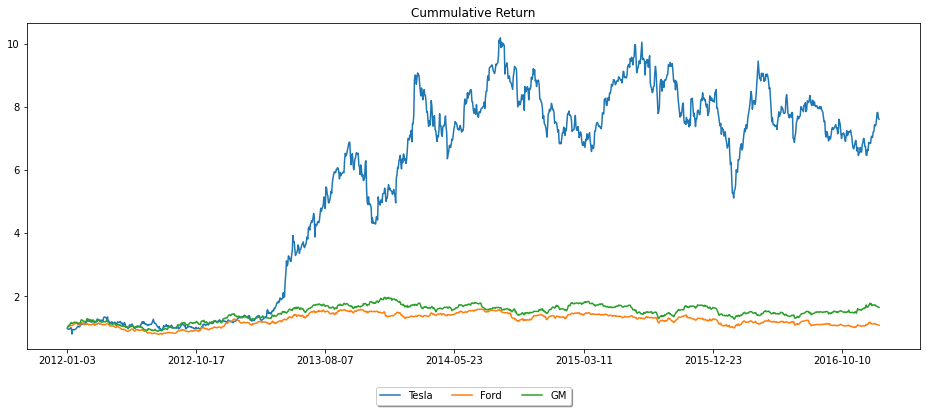

In [40]:
tesla['Cummulative Return'].plot(label='Tesla',figsize=(16,6),title='Cummulative Return')

ford['Cummulative Return'].plot(label='Ford')

gm['Cummulative Return'].plot(label='GM')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=8);#ncol is size of box

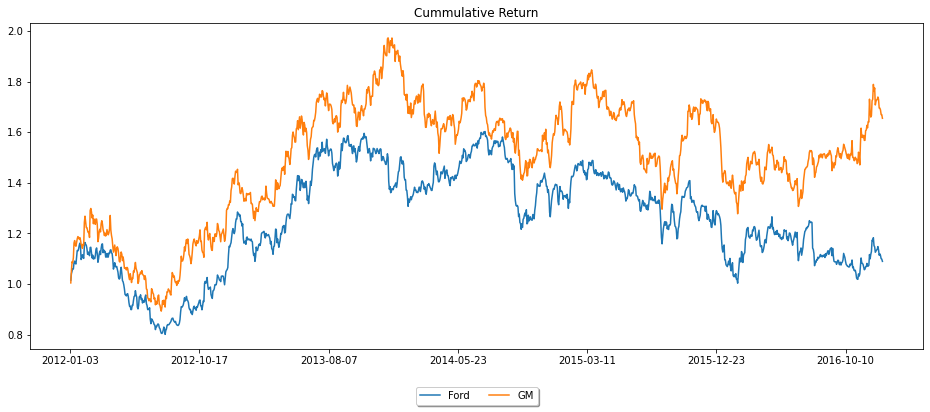

In [41]:
#As it is not clearly visible for ford and gm
ford['Cummulative Return'].plot(label='Ford',figsize=(16,6),title='Cummulative Return')

gm['Cummulative Return'].plot(label='GM')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=8);#ncol is size of box

____
#### Profit and Loss

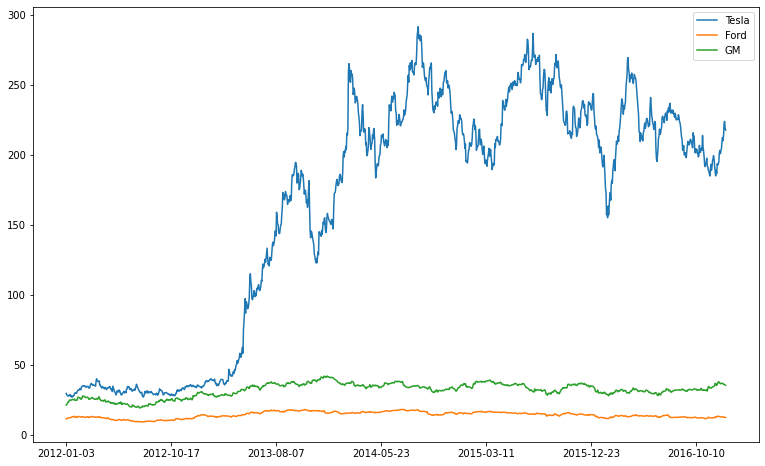

In [42]:
# Plotting before normalization
tesla.high.plot(figsize=(13,8))
ford.high.plot()
gm.high.plot()
plt.legend(['Tesla','Ford','GM'])
plt.show()

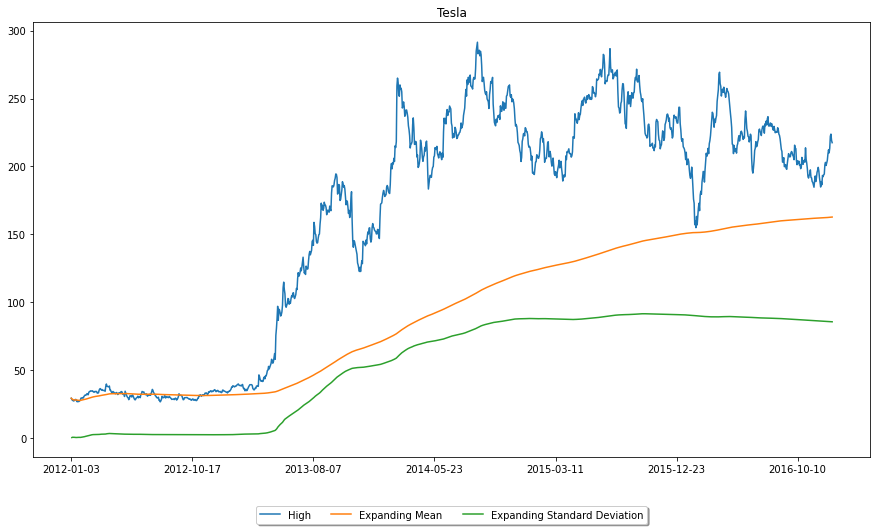

In [43]:
#Expanding for Tesla
tesla_mean=tesla.high.expanding().mean()
tesla_std=tesla.high.expanding().std()
tesla.high.plot(figsize=(15,8))
tesla_mean.plot()
tesla_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'],loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=9)
plt.title('Tesla')
plt.show()

###### We can see in 2012 to mid 2013 the high was almost nearby mean so we didn't amke much of the profit there and then particularly in start of 2016 our high value almost reached near mean
____

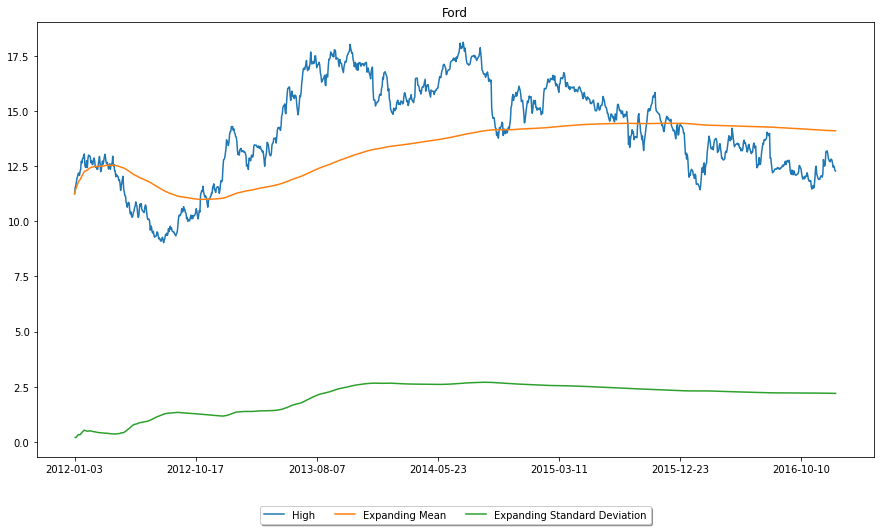

In [44]:
#Expanding for Ford
ford_mean=ford.high.expanding().mean()
ford_std=ford.high.expanding().std()
ford.high.plot(figsize=(15,8))
ford_mean.plot()
ford_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'],loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=9)
plt.title('Ford')
plt.show()

###### We can see in late 2012 and late 2015 to all over 2017 our high value was very much lesser than mean which clearly indicates we incurred a so much amount of loss.
____

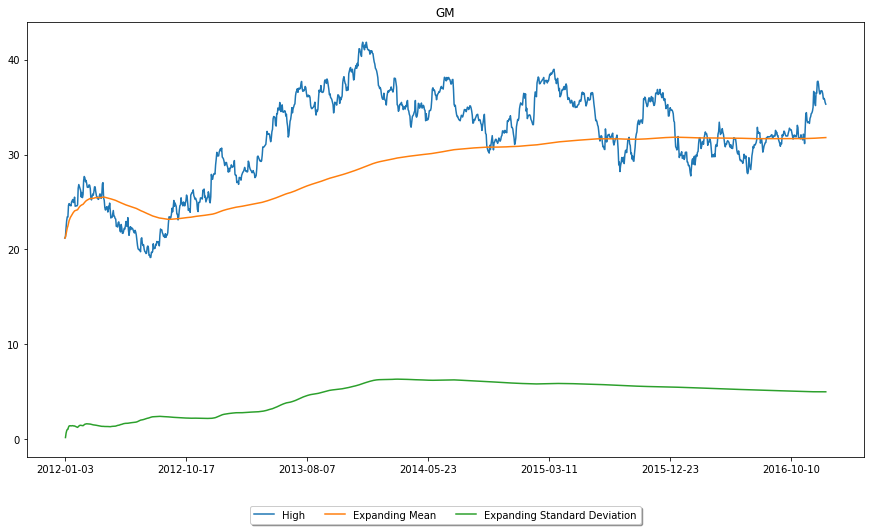

In [45]:
#Expanding for GM
gm_mean=gm.high.expanding().mean()
gm_std=gm.high.expanding().std()
gm.high.plot(figsize=(15,8))
gm_mean.plot()
gm_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'],loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=9)
plt.title('GM')
plt.show()

###### The same is the case of GM as Ford but slightly better in profits as compared to Ford.
###### But we can also conclude that every company had there bitter taste of shares in year 2015 to mid 2013 and later in 2016 could be an economical reasons.

###### We can clearly conclude through all the predictions that Tesla incurred huge profits as compared to other two car company brands. Clearly referring to presence of Elon Musk being in media also sets the predictions.

## Trends and Seasonality

In [46]:
from pylab import rcParams
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### High

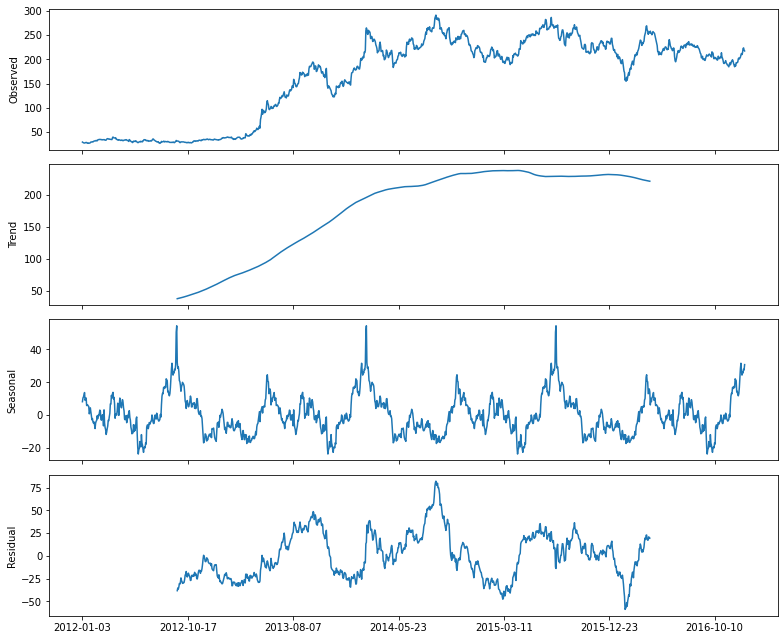

In [47]:
rcParams['figure.figsize'] = 11, 9
decomposed_tesla_volume = sm.tsa.seasonal_decompose(tesla["high"],freq=360) # The frequncy is annual
figure = decomposed_tesla_volume.plot()
plt.show()

###### There was a vey slow trend in 2012 and after that increased highly in 2015 then decreased trend after 2015
____

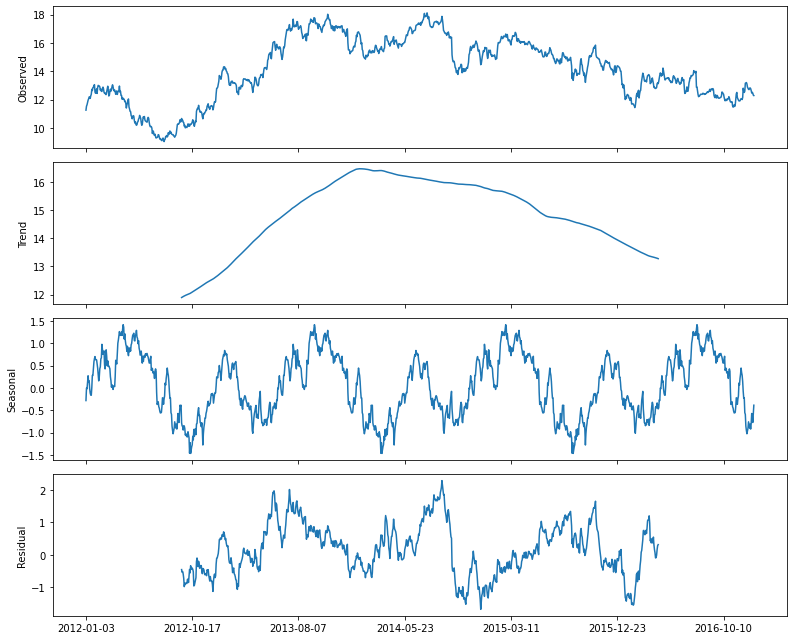

In [48]:
rcParams['figure.figsize'] = 11, 9
decomposed_ford_volume = sm.tsa.seasonal_decompose(ford["high"],freq=360) # The frequncy is annual
figure = decomposed_ford_volume.plot()
plt.show()

###### The seasonality of ford ifavored from late 2012 to mid 2014 and then they suffered losses
____

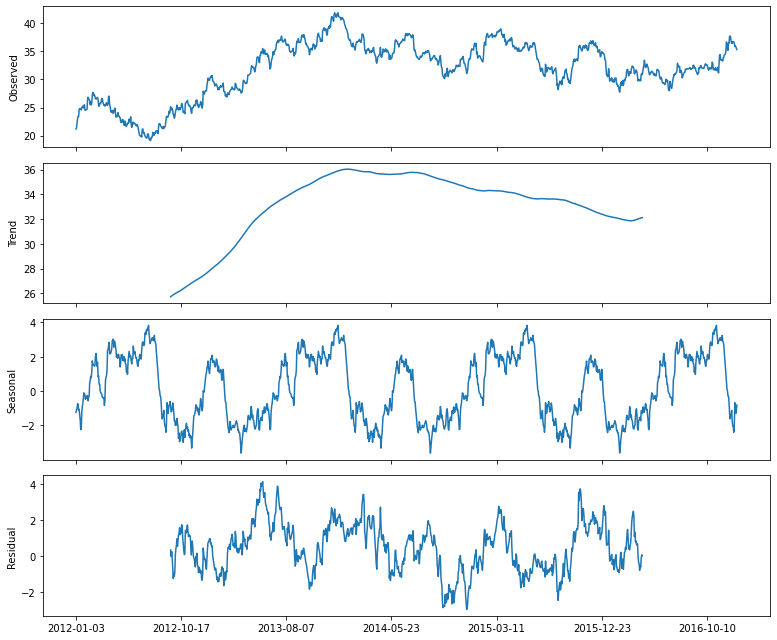

In [49]:
rcParams['figure.figsize'] = 11, 9
decomposed_gm_volume = sm.tsa.seasonal_decompose(gm["high"],freq=360) # The frequncy is annual
figure = decomposed_gm_volume.plot()
plt.show()

##### The same is case of GM as that of Ford

____
### Close

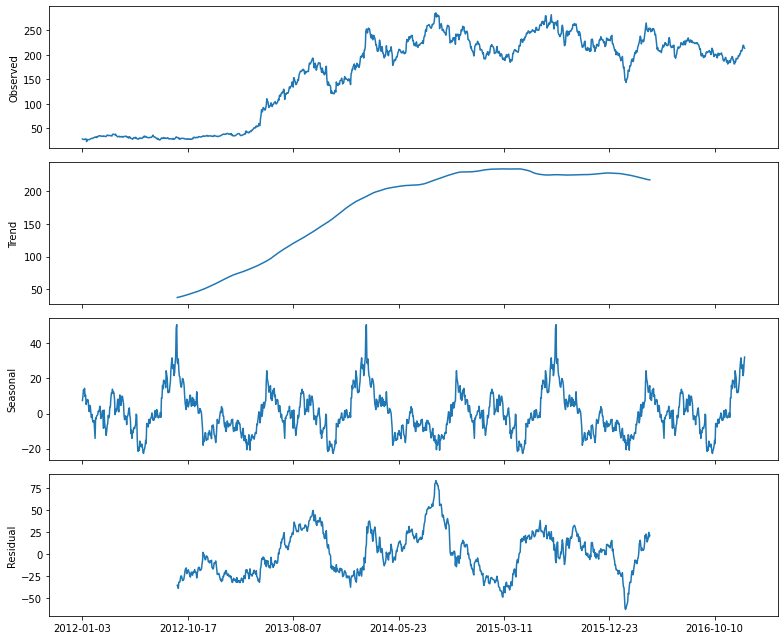

In [50]:
rcParams['figure.figsize'] = 11, 9
decomposed_tesla_volume = sm.tsa.seasonal_decompose(tesla["close"],freq=360) # The frequncy is annual
figure = decomposed_tesla_volume.plot()
plt.show()

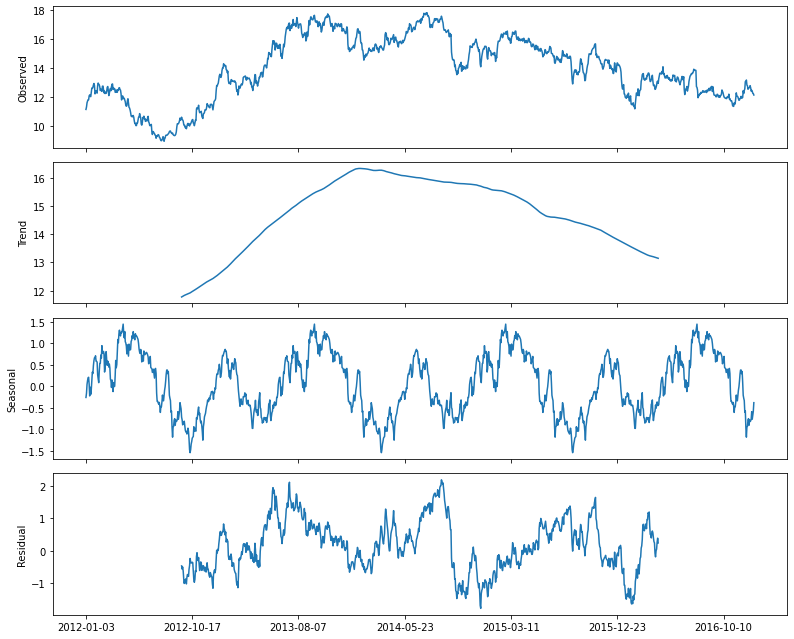

In [51]:
rcParams['figure.figsize'] = 11, 9
decomposed_ford_volume = sm.tsa.seasonal_decompose(ford["close"],freq=360) # The frequncy is annual
figure = decomposed_ford_volume.plot()
plt.show()

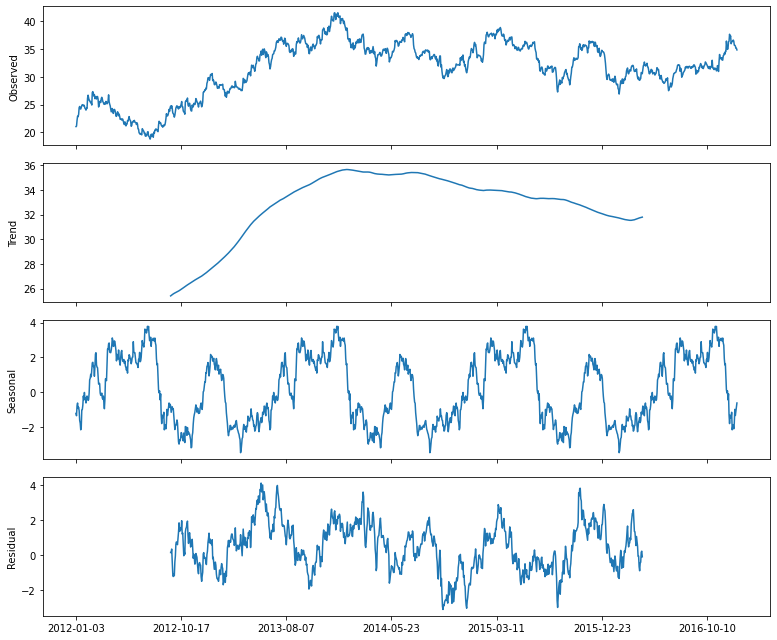

In [52]:
rcParams['figure.figsize'] = 11, 9
decomposed_gm_volume = sm.tsa.seasonal_decompose(gm["close"],freq=360) # The frequncy is annual
figure = decomposed_gm_volume.plot()
plt.show()

Because there have a very strong correlation between Close and High, we can see the trend and seasonality is very similar.

In [53]:
tesla.index.names = ['Date']
ford.index.names = ['Date']
gm.index.names = ['Date']

In [54]:
tesla.drop(['Total Traded','return','Cummulative Return'],axis=1,inplace=True)
ford.drop(['Total Traded','return','Cummulative Return'],axis=1,inplace=True)
gm.drop(['Total Traded','return','Cummulative Return'],axis=1,inplace=True)

In [55]:
tesla.head()

,open,high,low,close,volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928100
2012-01-04,28.21,28.67,27.50,27.71,630100
2012-01-05,27.76,27.93,26.85,27.12,1005500
2012-01-06,27.20,27.79,26.41,26.91,986300
2012-01-09,27.00,27.49,26.12,27.25,897000


In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
result = adfuller(tesla['open'])

In [58]:
result

(-1.5317386503666328,
 0.5177563649938665,
 1,
 1256,
 {'1%': -3.4355671297788666,
  '10%': -2.5679966213893057,
  '5%': -2.8638438984080117},
 7639.836051517149)

In [59]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [60]:
adf_check(tesla['open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.5317386503666328
p-value : 0.5177563649938665
#Lags Used : 1
Number of Observations Used : 1256
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [61]:
adf_check(tesla['close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.5286172950127732
p-value : 0.5193102820603582
#Lags Used : 0
Number of Observations Used : 1257
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [62]:
adf_check(ford['open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9609060401973855
p-value : 0.30397298676729584
#Lags Used : 0
Number of Observations Used : 1257
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [63]:
adf_check(ford['close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9352485380765807
p-value : 0.31566502459077683
#Lags Used : 1
Number of Observations Used : 1256
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [64]:
adf_check(gm['open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.358825660984347
p-value : 0.15369626225880595
#Lags Used : 1
Number of Observations Used : 1256
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [65]:
adf_check(gm['close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.4291750036993376
p-value : 0.13367070337628884
#Lags Used : 1
Number of Observations Used : 1256
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [66]:
#Tesla
tesla['close-1'] = tesla['close'] - tesla['close'].shift(1)

In [67]:
adf_check(tesla['close-1'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -34.34695819882301
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1256
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [68]:
#Ford
ford['close-1'] = ford['close'] - ford['close'].shift(1)

In [69]:
adf_check(ford['close-1'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -32.27470409671834
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1256
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [70]:
#GM
gm['close-1'] = gm['close'] - gm['close'].shift(1)

In [71]:
adf_check(gm['close-1'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -33.810336765312464
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1256
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


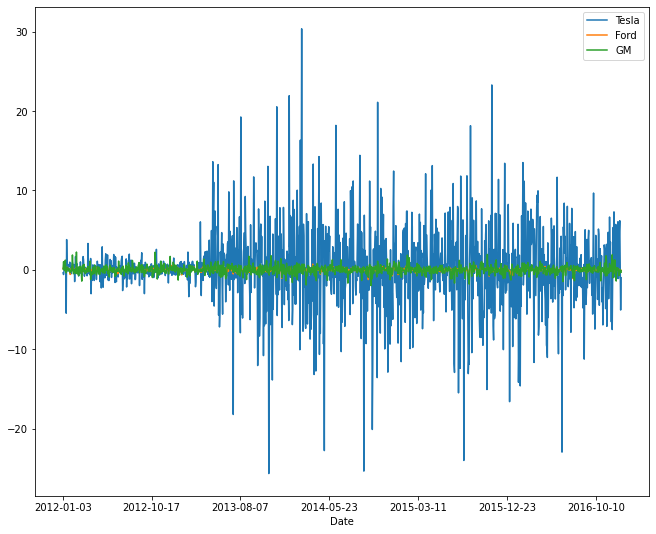

In [72]:
tesla['close-1'].plot(label='Tesla')
ford['close-1'].plot(label='Ford')
gm['close-1'].plot(label='GM')
plt.legend()

Seasonal Difference

In [73]:
#Tesla
tesla['seas'] = tesla['close'] - tesla['close'].shift(12)

In [74]:
adf_check(tesla['seas'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.663615856527671
p-value : 1.6634202122927515e-11
#Lags Used : 23
Number of Observations Used : 1222
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [75]:
#Ford
ford['seas'] = ford['close'] - ford['close'].shift(12)

In [76]:
adf_check(ford['seas'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.360771095397771
p-value : 9.513696565988837e-11
#Lags Used : 20
Number of Observations Used : 1225
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [77]:
#GM
gm['seas'] = gm['close'] - gm['close'].shift(12)

In [78]:
adf_check(gm['seas'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.268135738091836
p-value : 1.6146872001453656e-10
#Lags Used : 23
Number of Observations Used : 1222
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


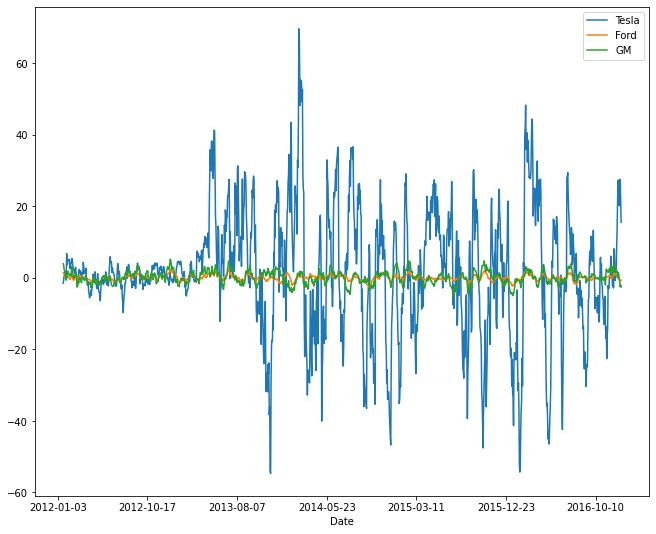

In [79]:
tesla['seas'].plot(label='Tesla')
ford['seas'].plot(label='Ford')
gm['seas'].plot(label='GM')
plt.legend()

AutoCorrelation Plots

# Autocorrelation and Partial Autocorrelation Plots

An autocorrelation plot (also known as a [Correlogram](https://en.wikipedia.org/wiki/Correlogram) ) shows the correlation of the series with itself, lagged by x time units. So the y axis is the correlation and the x axis is the number of time units of lag.

So imagine taking your time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now you have two series of length T−1 for which you calculate a correlation coefficient. This is the value of of the vertical axis at x=1x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x and this defines the plot.

You will run these plots on your differenced/stationary data. There is a lot of great information for identifying and interpreting ACF and PACF [here](http://people.duke.edu/~rnau/arimrule.htm) and [here](https://people.duke.edu/~rnau/411arim3.htm).

### Autocorrelation Interpretation

The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

* If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

* If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

_____
### <font color='red'> Important Note! </font> 

Here we will be showing running the ACF and PACF on multiple differenced data sets that have been made stationary in different ways, typically you would just choose a single stationary data set and continue all the way through with that.

The reason we use two here is to show you the two typical types of behaviour you would see when using ACF.
_____

In [80]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

TESLA

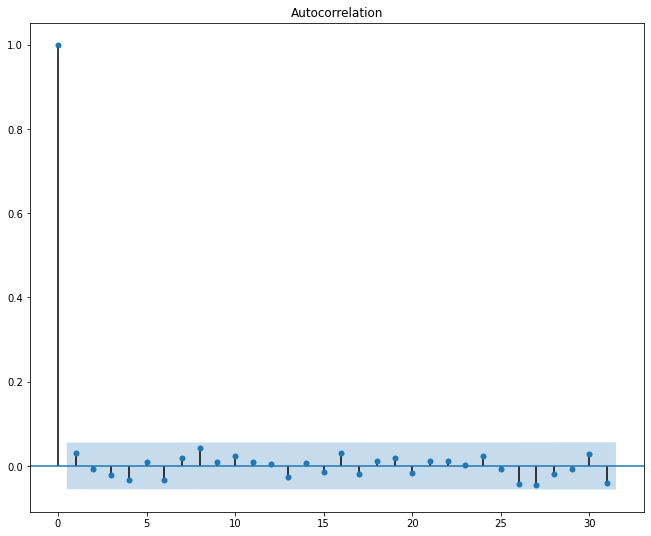

In [81]:
# Duplicate plots
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
fig_first_tesla = plot_acf(tesla['close-1'].dropna())

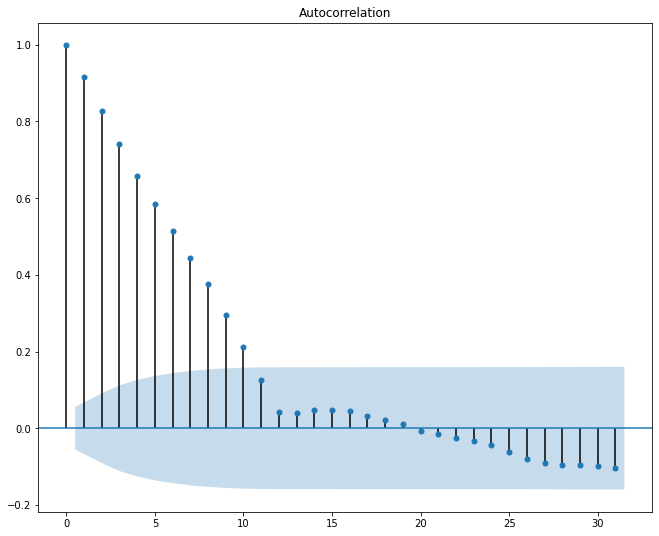

In [82]:
fig_seasonal_first_tesla = plot_acf(tesla['seas'].dropna())

FORD

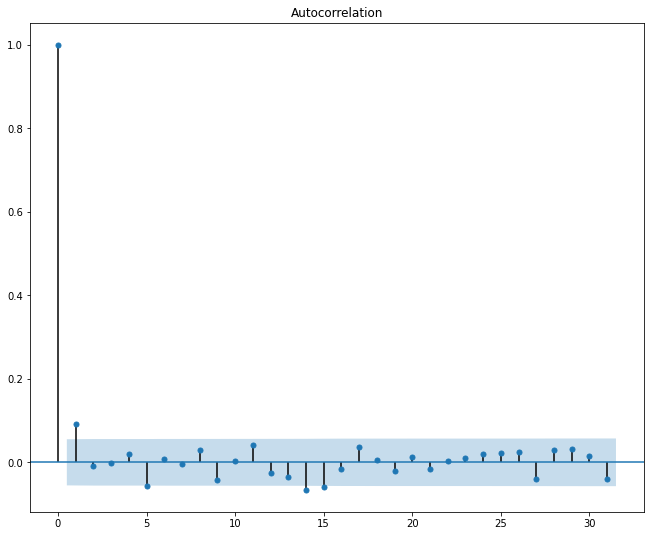

In [83]:
fig_first_ford = plot_acf(ford['close-1'].dropna())

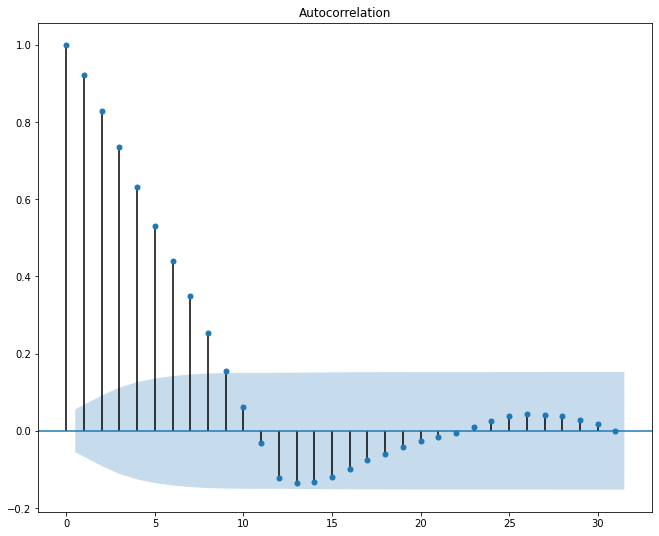

In [84]:
fig_seasonal_first_ford = plot_acf(ford['seas'].dropna())

GM

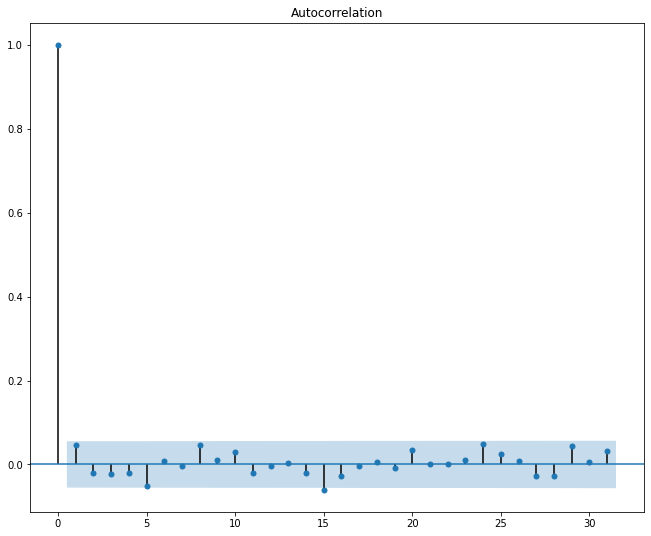

In [85]:
fig_first_gm = plot_acf(gm['close-1'].dropna())

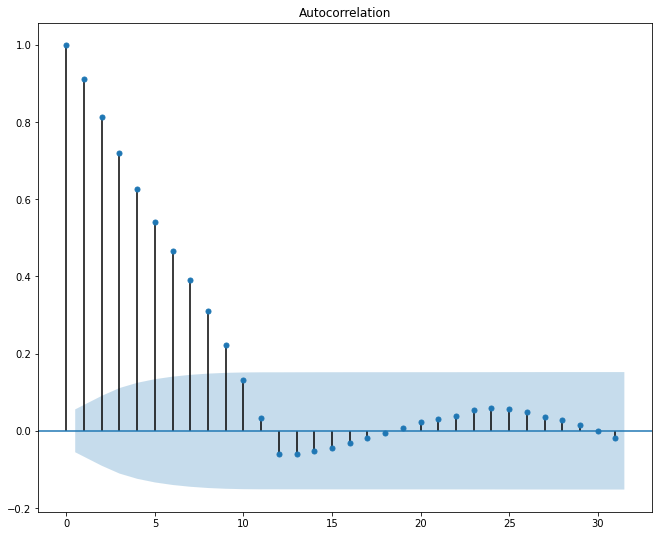

In [86]:
fig_seasonal_first_gm = plot_acf(gm['seas'].dropna())

Pandas also has this functionality built in, but only for ACF, not PACF. So I recommend using statsmodels, as ACF and PACF is more core to its functionality than it is to pandas' functionality.

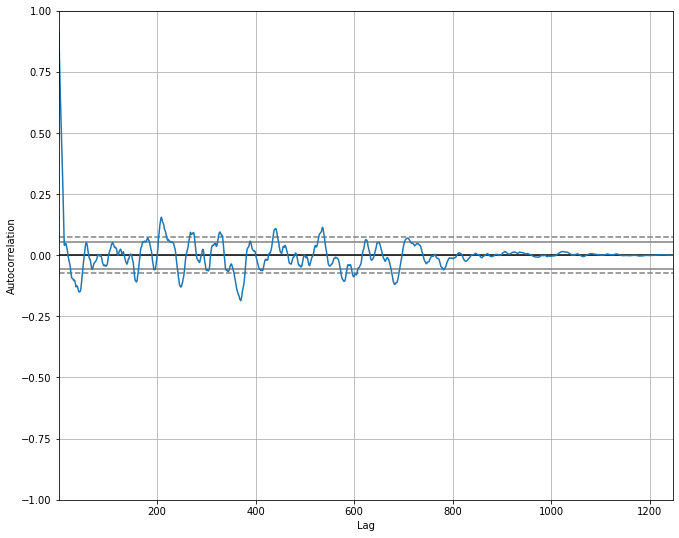

In [87]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(tesla['seas'].dropna())

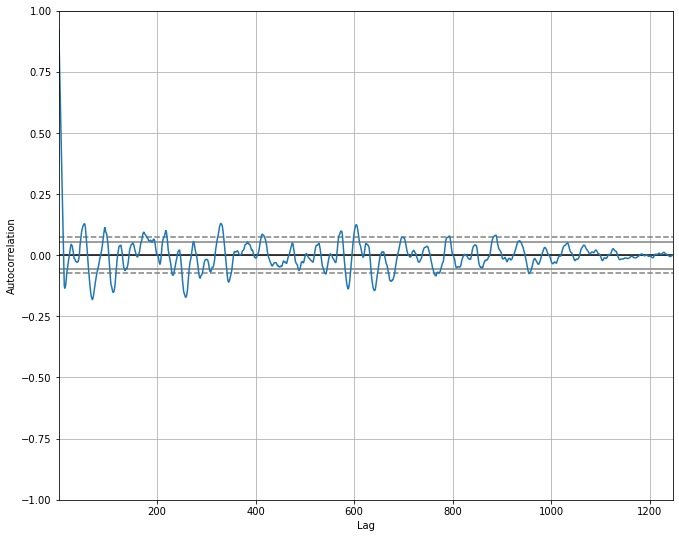

In [88]:
autocorrelation_plot(ford['seas'].dropna())

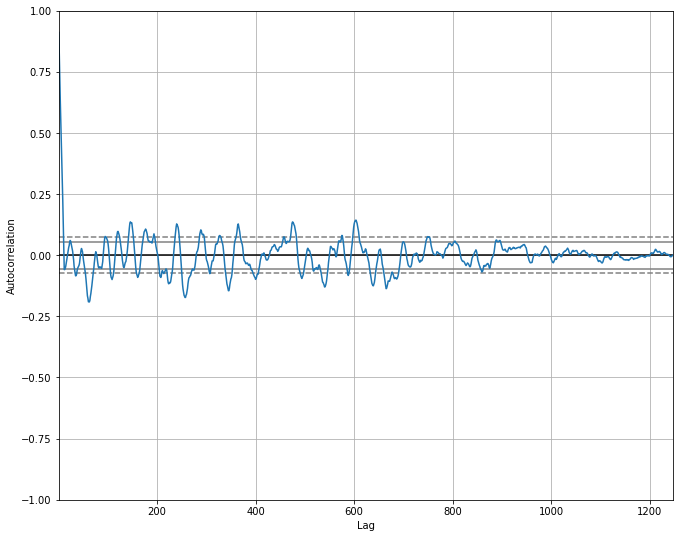

In [89]:
autocorrelation_plot(gm['seas'].dropna())

## Partial Autocorrelation

In general, a partial correlation is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

For instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables.  The partial correlation between y and x3 is the correlation between the variables determined taking into account how both y and x3 are related to x1 and x2.

Formally, this is relationship is defined as:

## $\frac{\text{Covariance}(y, x_3|x_1, x_2)}{\sqrt{\text{Variance}(y|x_1, x_2)\text{Variance}(x_3| x_1, x_2)}}$

Check out this [link](http://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm) for full details on this.

### Interpretation

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

## Using the Seasonal ARIMA model

Finally we can use our ARIMA model now that we have an understanding of our data!

In [90]:
from statsmodels.tsa.arima_model import ARIMA

In [91]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


### p,d,q parameters

* p: The number of lag observations included in the model.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [92]:
# We have seasonal data!
model1 = sm.tsa.statespace.SARIMAX(tesla['open'],order=(0,1,0), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print(results1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               open   No. Observations:                 1258
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -3869.612
Date:                            Sun, 25 Jul 2021   AIC                           7745.223
Time:                                    07:09:26   BIC                           7760.604
Sample:                                         0   HQIC                          7751.007
                                           - 1258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0233      0.025     -0.938      0.348      -0.072       0.025
ma.S.L12      -0.9996      0.516   

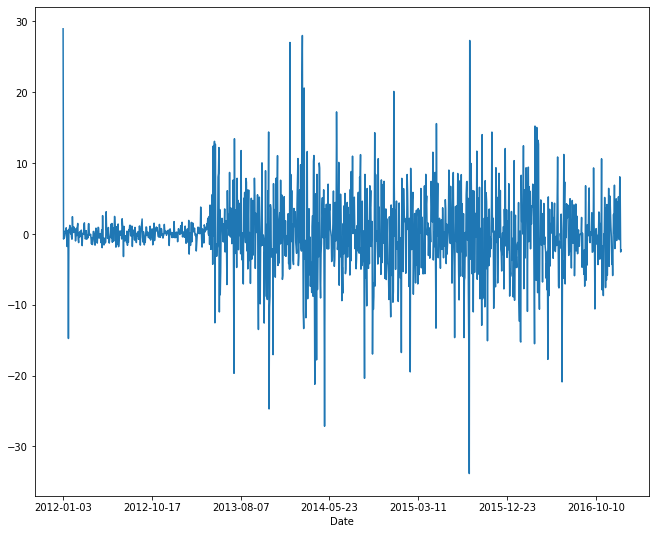

In [93]:
results1.resid.plot()

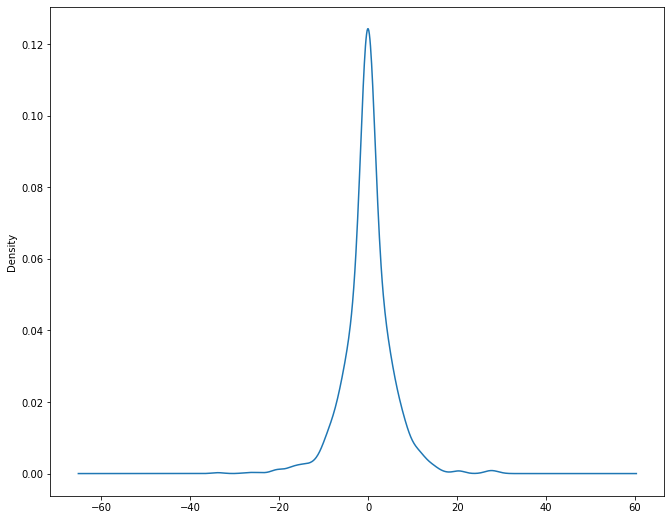

In [94]:
results1.resid.plot(kind='kde')

In [95]:
# We have seasonal data!
model2 = sm.tsa.statespace.SARIMAX(ford['open'],order=(0,1,0), seasonal_order=(1,1,1,12))
results2 = model2.fit()
print(results2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               open   No. Observations:                 1258
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                  79.556
Date:                            Sun, 25 Jul 2021   AIC                           -153.113
Time:                                    07:09:34   BIC                           -137.732
Sample:                                         0   HQIC                          -147.330
                                           - 1258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0104      0.031      0.334      0.738      -0.051       0.071
ma.S.L12      -0.9991      0.237   

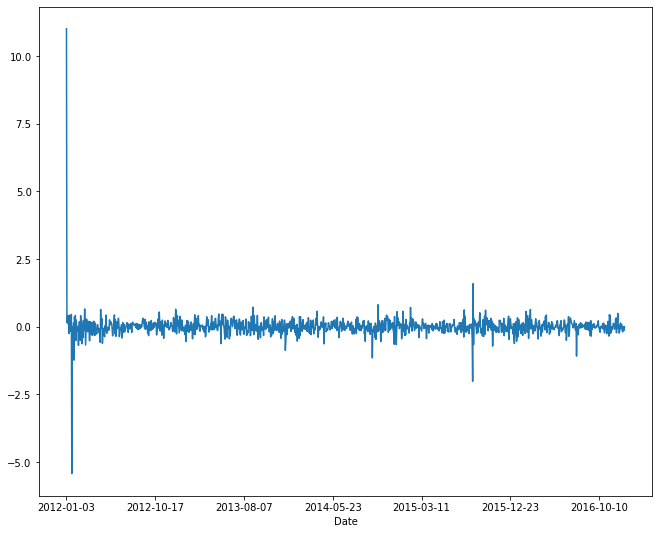

In [96]:
results2.resid.plot()

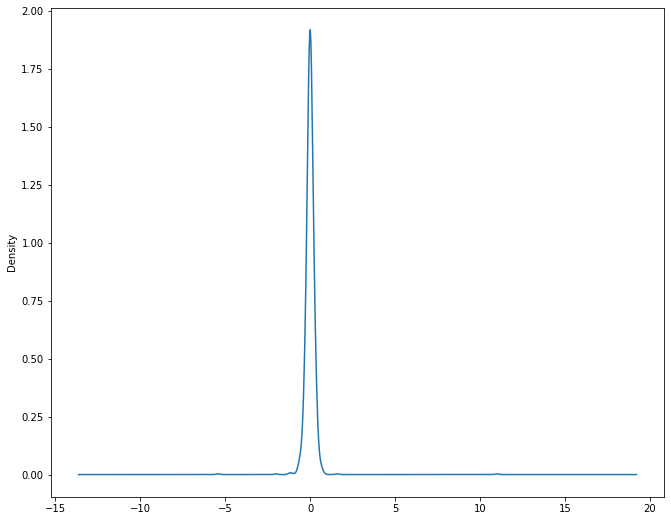

In [97]:
results2.resid.plot(kind='kde')

In [98]:
# We have seasonal data!
model3 = sm.tsa.statespace.SARIMAX(gm['open'],order=(0,1,0), seasonal_order=(1,1,1,12))
results3 = model3.fit()
print(results3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               open   No. Observations:                 1258
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -1012.220
Date:                            Sun, 25 Jul 2021   AIC                           2030.440
Time:                                    07:09:41   BIC                           2045.821
Sample:                                         0   HQIC                          2036.223
                                           - 1258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0113      0.028      0.407      0.684      -0.043       0.066
ma.S.L12      -0.9995      0.378   

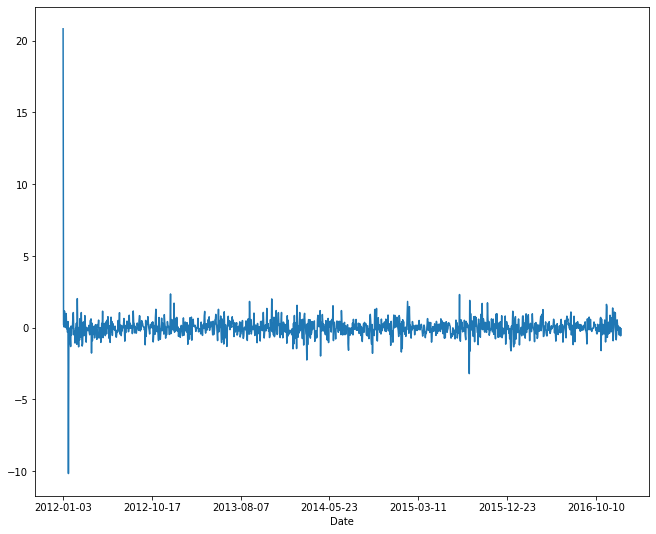

In [99]:
results3.resid.plot()

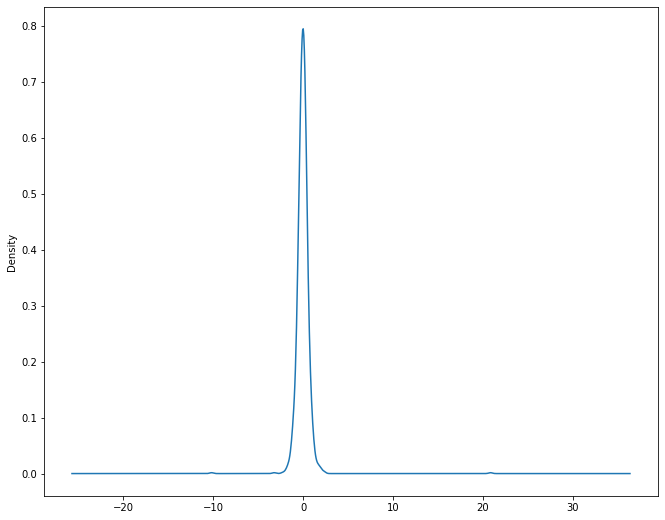

In [100]:
results3.resid.plot(kind='kde')